In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval


In [3]:
df = pd.read_csv('corpus.csv')
df.content = df.content.apply(lambda x: literal_eval(x))
df = df.drop_duplicates(subset=['date', 'title', 'url', 'segment_title'])
df.content = df.content.apply(lambda x: x[:-2])

In [4]:
df.shape

(7009, 6)

In [5]:
df['doc_length'] = df.content.apply(lambda x: len((' '.join(x)).split(' ')))

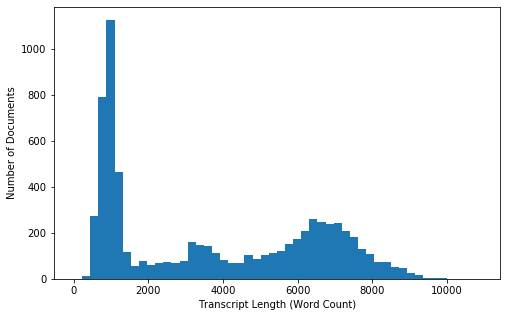

In [6]:

plt.figure(figsize=(8,5))

df.doc_length.hist(bins=50)
plt.rcParams.update({'font.size':14})
ax= plt.gca()
ax.grid(False)
plt.xlabel('Transcript Length (Word Count)')
plt.ylabel('Number of Documents')
plt.savefig('doc_length_hist.png')

In [7]:
df.date = pd.to_datetime(df.date)

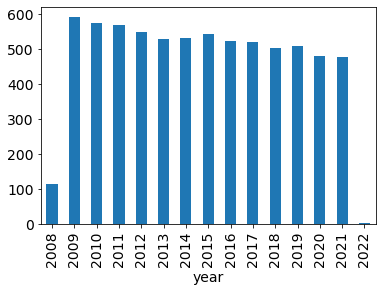

In [8]:
df.groupby('year').count()['title'].plot(kind='bar')

In [9]:
df['weekday'] = df.date.dt.dayofweek

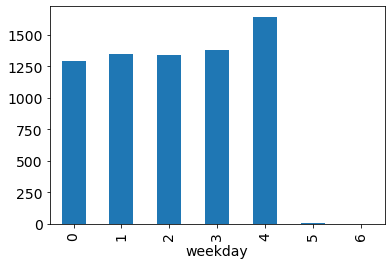

In [10]:
df.groupby('weekday')['title'].count().plot(kind='bar')

In [15]:
def return_host(x):
    result = re.match('.*?(?=host)', ' '.join(x).lower())
    if result:
        result = re.sub('[,\(\.]', '', result.group()).strip()
        result = result.replace('david', 'dave')
        result = re.sub('davis', 'davies', result)
        result = re.sub('davie$', 'davies', result)
        return result
    else:
#         print(x)
        return None

In [17]:
import re
df.content.apply(lambda x: return_host(x)).value_counts()[:5]

terry gross                           4512
dave davies                           1410
dave bianculli                         854
soundbite of music) terry gross         68
soundbite of music) dave bianculli      42
Name: content, dtype: int64